In [1]:
%load_ext autoreload
%autoreload 2

# Disable tf hardware warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
import matplotlib.pyplot as plt
from mmd_wrapper import mmd_combine
import numpy as np
from sklearn.decomposition import PCA

# MMD-MA

In [3]:
with open('./sample_data/mmd_ma/X_linearkernel.tsv', 'r') as f:
    k1_matrix = np.array([[float(num) for num in line.split('\t')] for line in f ])
with open('./sample_data/mmd_ma/Y_linearkernel.tsv', 'r') as f:
    k2_matrix = np.array([[float(num) for num in line.split('\t')] for line in f ])

In [4]:
mmd_ma_out = mmd_combine(k1_matrix, k2_matrix, method='mmd_ma')
mapping, hist = mmd_ma_out

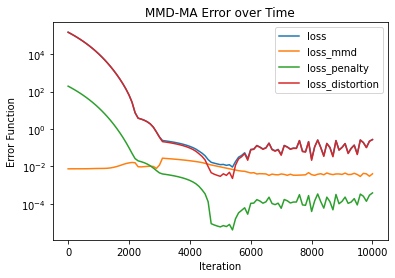

In [5]:
keys = ['loss', 'loss_mmd', 'loss_penalty', 'loss_distortion']

for k in keys:
    plt.plot(hist['iteration'], hist[k], label=k)

plt.xlabel('Iteration')
plt.ylabel('Error Function')
plt.yscale('log')
plt.title('MMD-MA Error over Time')

_ = plt.legend(loc='upper right')

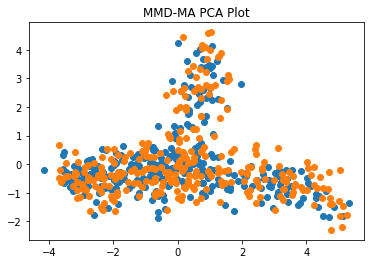

In [6]:
pca = PCA(n_components=2)
pca.fit(mapping[0])

for m in mapping:
    m_pca = pca.transform(m)
    plt.scatter(m_pca[:,0], m_pca[:,1])

_ = plt.title('MMD-MA PCA Plot')

# UnionCom

In [7]:
data1 = np.loadtxt("./sample_data/unioncom/domain1.txt")
data2 = np.loadtxt("./sample_data/unioncom/domain2.txt")
type1 = np.loadtxt("./sample_data/unioncom/type1.txt")
type2 = np.loadtxt("./sample_data/unioncom/type2.txt")
type1 = type1.astype(np.int)
type2 = type2.astype(np.int)

In [8]:
unioncom_out = mmd_combine(data1, data2, method='unioncom', 
                                verbose=0, 
                                updated=False)
mapping, hist, uc = unioncom_out
uc.test_LabelTA(mapping, [type1, type2])

label transfer accuracy of data1:
0.9633333333333334


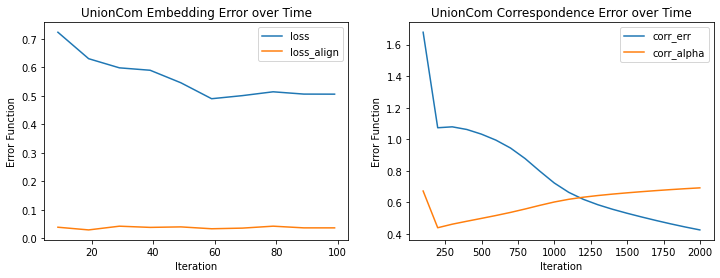

In [9]:
plt.subplots(figsize=(12,4))
plt.subplot(1,2,1)
keys = ['loss', 'loss_align']

for k in keys:
    plt.plot(hist['iteration'], hist[k], label=k)

plt.xlabel('Iteration')
plt.ylabel('Error Function')
plt.title('UnionCom Embedding Error over Time')

plt.legend(loc='upper right')

plt.subplot(1,2,2)
keys = ['corr_err', 'corr_alpha']

for k in keys:
    plt.plot(hist['corr_iteration'], hist[k], label=k)

plt.xlabel('Iteration')
plt.ylabel('Error Function')
plt.title('UnionCom Correspondence Error over Time')

_ = plt.legend(loc='upper right')

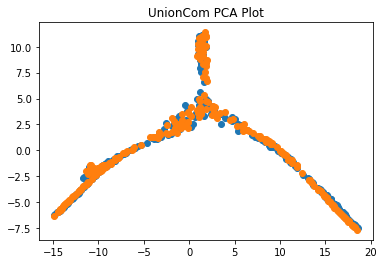

In [10]:
pca = PCA(n_components=2)
pca.fit(mapping[0])

for m in mapping:
    m_pca = pca.transform(m)
    plt.scatter(m_pca[:,0], m_pca[:,1])

_ = plt.title('UnionCom PCA Plot')

# ManiNetCluster

In [11]:
day_ortho = np.genfromtxt("./sample_data/maninetcluster/dayOrthoExpr.csv", delimiter=',')[1:,1:]
night_ortho = np.genfromtxt("./sample_data/maninetcluster/nightOrthoExpr.csv", delimiter=',')[1:,1:]

In [12]:
maninetcluster_out = mmd_combine(day_ortho, night_ortho,
                                 method='maninetcluster',
                                 alignment='nonlinear manifold aln',
                                 num_dims=2)
try:
    mapping, hist, mnc = maninetcluster_out
except:
    mapping, hist = maninetcluster_out
print('Pairwise Error: ' + str(hist['pairwise_error']))

Pairwise Error: 9.15331146183748


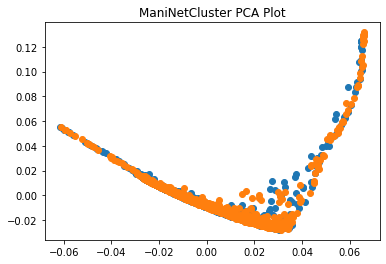

In [13]:
pca = PCA(n_components=2)
pca.fit(mapping[0])

for m in mapping:
    m_pca = pca.transform(m)
    plt.scatter(m_pca[:,0], m_pca[:,1])

_ = plt.title('ManiNetCluster PCA Plot')

# Comparison

In [14]:
# Load Data for UnionCom
data1 = np.loadtxt("./sample_data/unioncom/domain1.txt")[:,:300]
data2 = np.loadtxt("./sample_data/unioncom/domain2.txt")[:,:300]
type1 = np.loadtxt("./sample_data/unioncom/type1.txt")
type2 = np.loadtxt("./sample_data/unioncom/type2.txt")
type1 = type1.astype(np.int)
type2 = type2.astype(np.int)

In [15]:
mmd_ma_out = mmd_combine(data1, data2, method='mmd_ma')
print('MMD-MA Loss: ' + str(mmd_ma_out[1]['loss'][-1]), end='\n\n')

unioncom_out = mmd_combine(data1, data2, method='unioncom', verbose=0)
print('UnionCom Error:')
uc.test_LabelTA(unioncom_out[0], [type1, type2])
print()

maninetcluster_out = mmd_combine(data1, data2,
                                 method='maninetcluster',
                                 alignment='nonlinear manifold aln',
                                 num_dims=2)
print('ManiNetCluster Pairwise Error: ' + str(maninetcluster_out[1]['pairwise_error']))

MMD-MA Loss: 0.5930272

UnionCom Error:
label transfer accuracy of data1:
0.9633333333333334

ManiNetCluster Pairwise Error: 0.023508952901737698


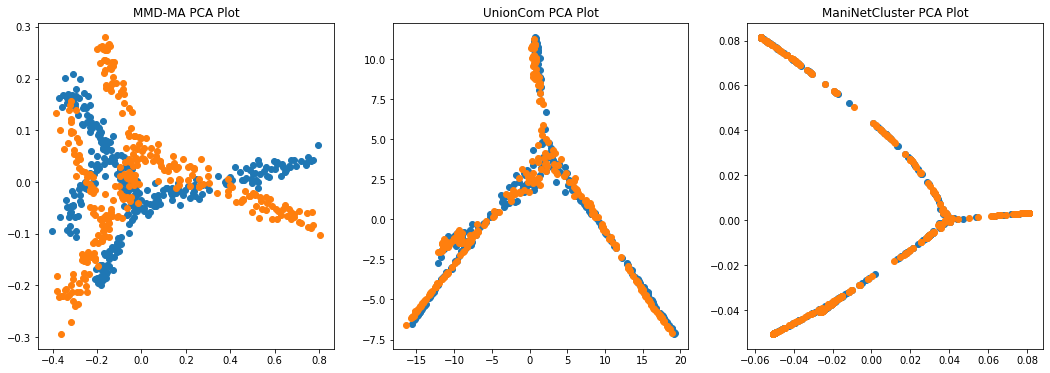

In [16]:
mappings = [mmd_ma_out[0], unioncom_out[0], maninetcluster_out[0]]
names = ['MMD-MA', 'UnionCom', 'ManiNetCluster']

plt.subplots(figsize=(18,6))
for i, mapping in enumerate(mappings):
    plt.subplot(1,3,i+1)
    
    pca = PCA(n_components=2)
    pca.fit(mapping[0])

    for m in mapping:
        m_pca = pca.transform(m)
        plt.scatter(m_pca[:,0], m_pca[:,1])

    plt.title(names[i] + ' PCA Plot')